In [22]:
#Import relevant python libraries
import requests, warnings, json, time, datetime, warnings, re, os
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as dates

import xarray as xr
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')

In [11]:
#Point to directory containing downloaded netcdf files from SOCCOM project
#Download data from http://soccompu.princeton.edu/www/dl.php?file=/FloatViz_Data/SOCCOM_HRQC_LIAR_netcdf_20180820.zip
pathname = '/Users/jesse/Downloads/SOCCOM_HRQC_LIAR_netcdf_20180820'
list_files = os.listdir(pathname)
display(list_files)

['9096SOOCN_HRQC.nc',
 '9091SOOCN_HRQC.nc',
 '12380SOOCN_HRQC.nc',
 '9668SOOCN_HRQC.nc',
 '12733SOOCN_HRQC.nc',
 '12734SOOCN_HRQC.nc',
 '9313SOOCN_HRQC.nc',
 '9018SOOCN_HRQC.nc',
 '7613SOOCN_HRQC.nc',
 '12745SOOCN_HRQC.nc',
 '7614SOOCN_HRQC.nc',
 '12742SOOCN_HRQC.nc',
 '6091SOOCN_HRQC.nc',
 '9659SOOCN_HRQC.nc',
 '12702SOOCN_HRQC.nc',
 '12757SOOCN_HRQC.nc',
 '9265SOOCN_HRQC.nc',
 '12381SOOCN_HRQC.nc',
 '12379SOOCN_HRQC.nc',
 '12386SOOCN_HRQC.nc',
 '12549SOOCN_HRQC.nc',
 '7652SOOCN_HRQC.nc',
 '9254SOOCN_HRQC.nc',
 '12744SOOCN_HRQC.nc',
 '8514SOOCN_HRQC.nc',
 '12551SOOCN_HRQC.nc',
 '9762SOOCN_HRQC.nc',
 '9655SOOCN_HRQC.nc',
 '9600SOOCN_HRQC.nc',
 '8501SOOCN_HRQC.nc',
 '12543SOOCN_HRQC.nc',
 '9652SOOCN_HRQC.nc',
 '12709SOOCN_HRQC.nc',
 '9631SOOCN_HRQC.nc',
 '12575SOOCN_HRQC.nc',
 '12361SOOCN_HRQC.nc',
 '12366SOOCN_HRQC.nc',
 '12542SOOCN_HRQC.nc',
 '12545SOOCN_HRQC.nc',
 '9125SOOCN_HRQC.nc',
 '9646SOOCN_HRQC.nc',
 '12748SOOCN_HRQC.nc',
 '9752SOOCN_HRQC.nc',
 '9101SOOCN_HRQC.nc',
 '12779SOOC

In [12]:
#Remove any files that aren't netcdf - defensive coding
for i in list_files:
    if i.endswith('.nc') == False:
        list_files.remove(i)
filenames = [os.path.join(pathname, i) for i in list_files]
display(filenames)

In [26]:
#To open one file at a time
ds = xr.open_dataset('12755SOOCN_HRQC.nc')

In [21]:
# Display contents of the header file for purpose of determining WMO ID:
ds.Comments

'\n//0\n//File updated on 08/09/2018 15:48\n//!! ADJUSTED DATA FILE !!\n//WMO ID: 5905367\n//Univ. of Washington ID: 12755\n//MBARI ID: 12755SOOCN\n//No missing float profiles\n//Missing Float position interpolated for station(s): 14 15 \n//Latitude quality flag = 4 for interpolated float positions\n//No position for station(s): 17 18 19 20 \n//Missing Float data detected for adjusted station(s): 17 18 19 20 \n//\n//FLOAT VARIABLES:\n//Variable Sensor Serial number Comment\n//Pressure[dbar] Sbe41cp 9025 \n//Temperature[�C] Sbe41cp 9025 \n//Salinity[pss] Sbe41cp 9025 \n//Sigma_theta[kg/m^3]   Potential density at the sea surface\n//Depth[m]   Depth calculated from pressure and latitude\n//Oxygen[�mol/kg] Aanderaa 4330 2673 \n//OxygenSat[%]   Calculation assumes atmospheric pressure= 1013.25 mbar\n//Nitrate[�mol/kg] ISUS Lamp#C6.A01.0068  Spec#107978 Equitech Ti probe #1703.05  MBARI ARGO float#778  DF#169  CTD#9025 \n//Chl_a[mg/m^3] FLBBAP2 4420 \n//Chl_a_corr[mg/m^3] FLBBAP2 4420 See: 

In [51]:
#Find the WMO ID in the comment and assign to WMO_ID
pattern = r'WMO ID: (\d+)'
match=re.search(pattern,ds.Comments)
WMO_ID= match.groups()[0]
display(temp_fltnum)

'5905367'

In [30]:
#Function to open all files
def open_data(file):
    ds = xr.open_dataset(file)
    return ds


In [31]:
#Open each file in the list using the function open_data
all_ds = [open_data(file) for file in filenames]

In [54]:
#Show formating of all-ds and get used to python indexing 
#display(all_ds)
print(all_ds[0]['Salinity'][0])
print(np.shape(all_ds[0]['Salinity'][:,0]))
print(np.shape(all_ds[0]['JULD']))



<xarray.DataArray 'Salinity' (N_LEVELS: 556)>
array([ 3.46907e+01,  3.46922e+01,  3.46959e+01, ...,  3.38640e+01,
        3.38640e+01, -1.00000e+10])
Dimensions without coordinates: N_LEVELS
Attributes:
    units:    pss
(131,)
(131,)


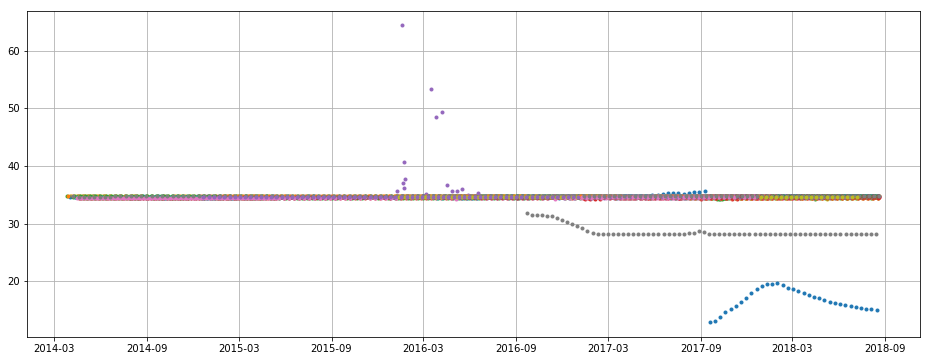

In [49]:
#Plot Salinity data versus time for all SOCOMM floats at shallowest pressure
#NEED TO REMOVE DATA WITH BAD QUALITY FLAGS!!!!

fig, ax = plt.subplots(1)
fig.set_size_inches(16, 6)

for i,value in enumerate(all_ds):
    ax.plot(all_ds[i]['JULD'], all_ds[i]['Salinity'][:,0], marker='.', linewidth=0)
ax.grid()

plt.title('All SOCCOM Floats')
plt.ylabel('Salinity')
plt.xlabel('Date')
plt.show()

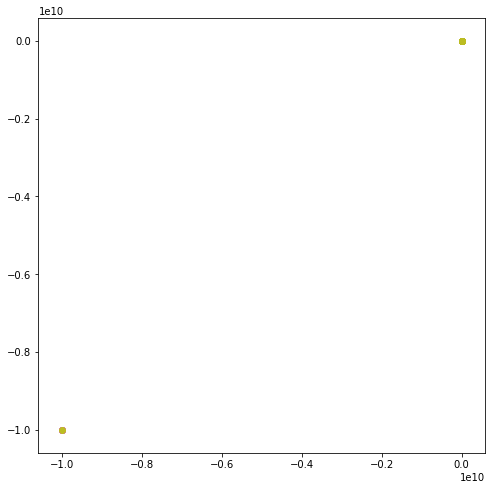

In [55]:
#Trying to plot T/S here work in progress
#NEED TO REMOVE DATA WITH BAD QUALITY FLAGS!!!!

smin=50
tmin=100
smax=0
tmax=-10
fig = plt.figure(figsize=(8,8))

for i,value in enumerate(all_ds):
    plt.scatter(all_ds[i]['Salinity'][1,:],all_ds[i]['Temperature'][1,:])
   

In [57]:
display(all_ds[1]['Salinity'][1,:])

<xarray.DataArray 'Salinity' (N_LEVELS: 555)>
array([ 3.47033e+01,  3.47051e+01,  3.47065e+01, ...,  3.38220e+01,
       -1.00000e+10, -1.00000e+10])
Dimensions without coordinates: N_LEVELS
Attributes:
    units:    pss